# Regional Scatter Plots

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import csv
import os
from pprint import pprint
import requests
import json
import html
from scipy.stats import linregress
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import chi2_contingency

In [25]:
csv_merge = "../Resources/newmerge_1416.csv"
df_1416 = pd.read_csv(csv_merge)

In [26]:
df_14_16 = df_1416.sort_values(by = "E-Government Index_2014")
df_14_16

,Region_2014,ISO,ODB-Rank_2014,Country,ODB-Score-Scaled_2014,Readiness-Scaled_2014,Implementation-Innovation-Scaled_2014,Implementation-Social-Scaled_2014,Implementation-Accountability-Scaled_2014,Implementation-Rank_2014,...,Impact-Political-Scaled_2016,Impact-Social-Scaled_2016,Impact-Economic-Scaled_2016,Impact-Rank_2016,E-Government Rank_2016,E-Government Index_2016,E-Participation Index_2016,Online Service Index_2016,Human Capital Index_2016,Telecommunication Infrastructure Index_2016
73,Sub-Saharan Africa,SL,78,Sierra Leone,7.54,19,4,8,20,77,...,19,0,0,73,186,0.15942,0.11864,0.11594,0.24068,0.12163
76,Sub-Saharan Africa,ML,84,Mali,3.30,19,2,2,6,86,...,0,0,0,103,182,0.18165,0.06780,0.09420,0.23583,0.21492
63,Sub-Saharan Africa,BJ,68,Benin,11.98,15,15,32,8,60,...,0,0,0,93,177,0.20389,0.16949,0.14493,0.31964,0.14709
66,Sub-Saharan Africa,BF,74,Burkina Faso,11.32,31,7,22,9,72,...,47,15,8,34,185,0.15977,0.23729,0.18841,0.16773,0.12318
77,Latin America & Caribbean,HT,85,Haiti,1.19,5,4,5,7,84,...,0,0,0,99,178,0.19314,0.13559,0.16667,0.31240,0.10036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,East Asia & Pacific,JP,19,Japan,53.58,81,53,62,39,20,...,82,80,51,4,11,0.84397,0.98305,0.87681,0.82738,0.82771
3,Europe & Central Asia,NL,6,Netherlands,75.79,95,79,82,56,5,...,63,50,47,16,7,0.86586,0.94915,0.92754,0.91830,0.75173
1,Europe & Central Asia,FR,4,France,80.21,91,75,79,61,7,...,90,55,62,5,10,0.84559,0.89831,0.94203,0.84452,0.75021
25,East Asia & Pacific,SG,29,Singapore,46.06,71,39,57,22,33,...,36,30,31,24,4,0.88280,0.91525,0.97101,0.83598,0.84141


### Europe 2014 

#### E-Government Index and ODC Score 2014

In [27]:
europe_region_2014 = df_14_16[['Country', 'Region_2014', 'E-Government Index_2014', 'ODB-Score-Scaled_2014']]
europe_region_2014 = europe_region_2014[europe_region_2014['Region_2014'] == 'Europe & Central Asia']
europe_region_2014 = europe_region_2014.reset_index(drop = True)

In [28]:
x_axis = europe_region_2014['E-Government Index_2014'] * 100
y_axis = europe_region_2014['ODB-Score-Scaled_2014']

The r-squared is : 0.782


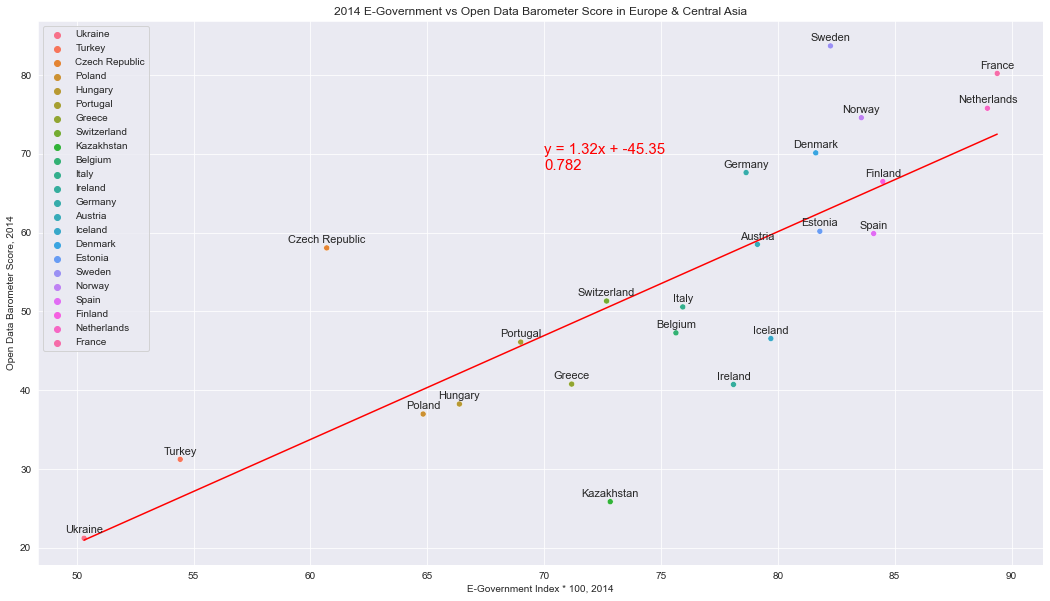

In [29]:
def weather_graphing(x_axis, y_axis, title, xlabel, ylabel, text_coordinates):
    #linear regression
    print(f"The r-squared is : {round(st.pearsonr(x_axis, y_axis)[0],3)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.figure(figsize=(18,10))
    #plt.bar(x_axis, y_axis)
    sns.scatterplot(x = x_axis, y = y_axis, data = europe_region_2014, hue = "Country")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    #plt.xticks()
    #plt.grid()
    plt.legend(loc='upper left')
    plt.annotate(line_eq, text_coordinates,fontsize=15,color="red")
    plt.annotate(round(st.pearsonr(x_axis, y_axis)[0],3), (70,68),fontsize=15,color="red")
    plt.plot(x_axis,regress_values,"r-")
    for i, label in enumerate(europe_region_2014['Country']):
        plt.text(x_axis[i], y_axis[i]+1,label, size=11, ha='center', va='center')
    plt.savefig("../Images/2014 E-Government vs Open Data Barometer Score in Europe & Central Asia")
    
weather_graphing(x_axis, y_axis, "2014 E-Government vs Open Data Barometer Score in Europe & Central Asia", "E-Government Index * 100, 2014", "Open Data Barometer Score, 2014", (70,70))
sns.set_style('darkgrid')

    
    

#### Human Capital vs odb 2014

In [7]:
# odb_human2014 = df_14_16[['Country', 'Region_2014', 'Human Capital Index_2014', 'ODB-Score-Scaled_2014']]
# odb_human2014 = odb_human2014[odb_human2014['Region_2014'] == 'Europe & Central Asia']
# odb_human2014 = odb_human2014.reset_index(drop = True)

In [8]:
# x_axis = odb_human2014['Human Capital Index_2014']*100
# y_axis = odb_human2014['ODB-Score-Scaled_2014']


# def weather_graphing(x_axis, y_axis, title, xlabel, ylabel, text_coordinates):
#     #linear regression
#     print(f"The r-squared is : {round(st.pearsonr(x_axis, y_axis)[0],3)}")
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#     regress_values = x_axis * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
#     plt.figure(figsize=(18,10))
#     #plt.bar(x_axis, y_axis)
#     sns.scatterplot(x = x_axis, y = y_axis, data = odb_human2014, hue = 'Country')
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.title(title)
#     #plt.grid()
#     plt.annotate(line_eq, text_coordinates,fontsize=15,color="red")
#     plt.plot(x_axis,regress_values,"r-")
    
# weather_graphing(x_axis, y_axis, "Europe & Central Asia: ODB vs Human capital, 2014", "Human Capital 2014", "ODB- 2014", (75,20))
# sns.set_style('darkgrid')
# for i, label in enumerate(odb_human2014['Country']):
#     plt.text(x_axis[i]+.5, y_axis[i],label)

### Europe 2016

#### E-Government Index and ODC Score 2016

In [9]:
europe_region_2016 = df_14_16[['Country', 'Region_2014', 'E-Government Index_2016', 'ODB-Score-Scaled_2016']]
europe_region_2016 = europe_region_2016[europe_region_2016['Region_2014'] == 'Europe & Central Asia']
europe_region_2016 = europe_region_2016.reset_index(drop=True)

In [10]:
x_axis = europe_region_2016['E-Government Index_2016'] * 100
y_axis = europe_region_2016['ODB-Score-Scaled_2016']

The r-squared is : 0.717


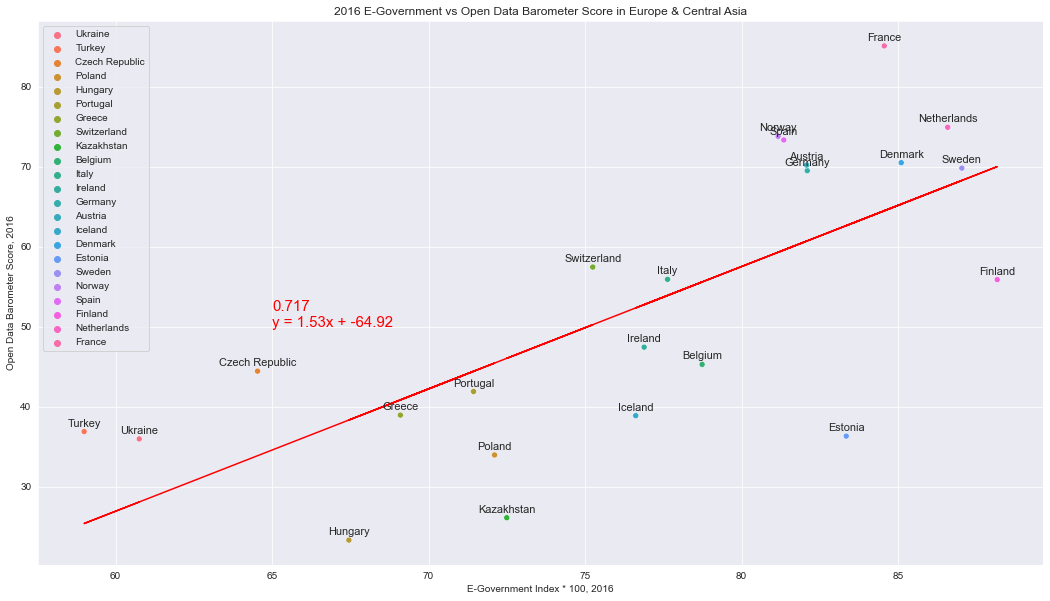

In [11]:
def weather_graphing(x_axis, y_axis, title, xlabel, ylabel, text_coordinates):
    #linear regression
    print(f"The r-squared is : {round(st.pearsonr(x_axis, y_axis)[0],3)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
       
    plt.figure(figsize=(18,10))
    #plt.bar(x_axis, y_axis)
    sns.scatterplot(x = x_axis, y = y_axis, data = europe_region_2016, hue = "Country")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
#     plt.xticks()
    #plt.grid()
    plt.annotate(line_eq, text_coordinates,fontsize=15,color="red")
    plt.annotate(round(st.pearsonr(x_axis, y_axis)[0],3), (65,52),fontsize=15,color="red")
    plt.legend(loc='upper left')
    plt.plot(x_axis,regress_values,"r-")
    for i, label in enumerate(europe_region_2016['Country']):
        plt.text(x_axis[i], y_axis[i]+1,label, size=11, ha='center', va='center')
    plt.savefig("../Images/2016 E-Government vs Open Data Barometer Score in Europe & Central Asia")
    
weather_graphing(x_axis, y_axis, "2016 E-Government vs Open Data Barometer Score in Europe & Central Asia", "E-Government Index * 100, 2016", "Open Data Barometer Score, 2016", (65,50))
sns.set_style('darkgrid')


#### Human Capital vs odb 2016

In [12]:
# odb_human2016 = df_14_16[['Country', 'Region_2014', 'Human Capital Index_2016', 'ODB-Score-Scaled_2016']]
# odb_human2016 = odb_human2016[odb_human2016['Region_2014'] == 'Europe & Central Asia']
# odb_human2016 = odb_human2016.reset_index(drop = True)

In [13]:
# x_axis = odb_human2016['Human Capital Index_2016']*100
# y_axis = odb_human2016['ODB-Score-Scaled_2016']


# def weather_graphing(x_axis, y_axis, title, xlabel, ylabel, text_coordinates):
#     #linear regression
#     print(f"The r-squared is : {round(st.pearsonr(x_axis, y_axis)[0],3)}")
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#     regress_values = x_axis * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
#     plt.figure(figsize=(18,10))
#     #plt.bar(x_axis, y_axis)
#     sns.scatterplot(x = x_axis, y = y_axis, data = odb_human2014, hue = 'Country')
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.title(title)
#     #plt.grid()
#     plt.annotate(line_eq, text_coordinates,fontsize=15,color="red")
#     plt.plot(x_axis,regress_values,"r-")
    
# weather_graphing(x_axis, y_axis, "Europe & Central Asia: ODB vs Human capital, 2016", "Human Capital 2016", "ODB- 2016", (80,30))
# sns.set_style('darkgrid')
# for i, label in enumerate(odb_human2016['Country']):
#     plt.text(x_axis[i]+.5, y_axis[i],label)

### Latin America 2014

#### E-Government Index and ODC Score 2014

In [14]:
latin_region_2014 = df_14_16[['Country', 'Region_2014', 'E-Government Index_2014', 'ODB-Score-Scaled_2014']]
latin_region_2014 = latin_region_2014[latin_region_2014['Region_2014'] == 'Latin America & Caribbean']
latin_region_2014 = latin_region_2014.reset_index(drop=True)

In [15]:
x_axis = latin_region_2014['E-Government Index_2014'] * 100
y_axis = latin_region_2014['ODB-Score-Scaled_2014']

The r-squared is : 0.784


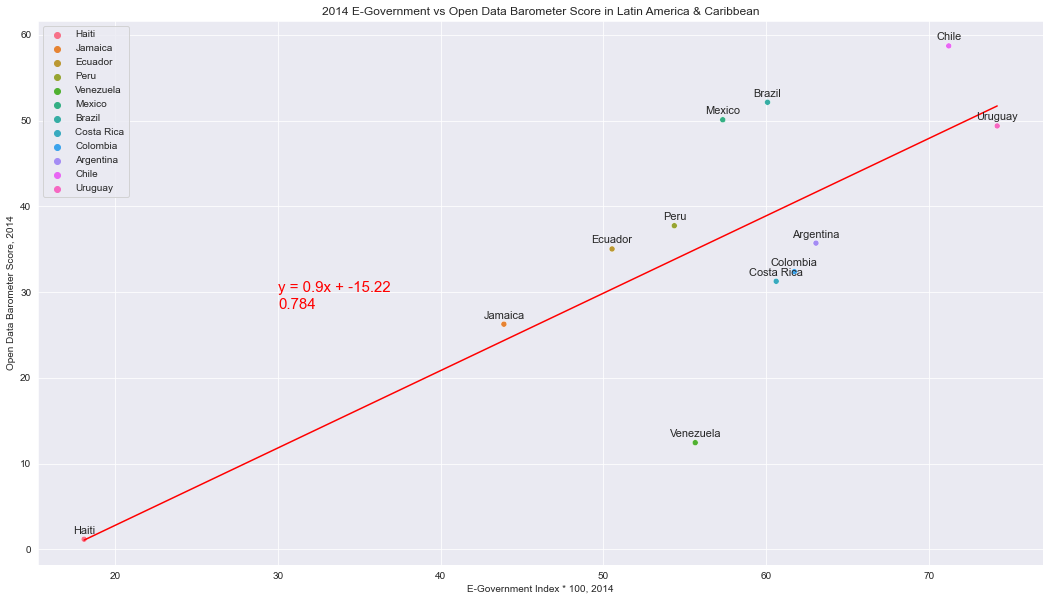

In [16]:
def weather_graphing(x_axis, y_axis, title, xlabel, ylabel, text_coordinates):
    #linear regression
    print(f"The r-squared is : {round(st.pearsonr(x_axis, y_axis)[0],3)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.figure(figsize=(18,10))
    #plt.bar(x_axis, y_axis)
    sns.scatterplot(x = x_axis, y = y_axis, data = latin_region_2014, hue = "Country")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks()
    #plt.grid()
    plt.legend(loc='upper left')
    plt.annotate(line_eq, text_coordinates,fontsize=15,color="red")
    plt.annotate(round(st.pearsonr(x_axis, y_axis)[0],3), (30,28),fontsize=15,color="red")
    plt.plot(x_axis,regress_values,"r-")
    for i, label in enumerate(latin_region_2014['Country']):
        plt.text(x_axis[i], y_axis[i]+1,label, size=11, ha='center', va='center')
    plt.savefig("../Images/2014 E-Government vs Open Data Barometer Score in Latin America & Caribbean")
    
weather_graphing(x_axis, y_axis, "2014 E-Government vs Open Data Barometer Score in Latin America & Caribbean", "E-Government Index * 100, 2014", "Open Data Barometer Score, 2014", (30,30))
sns.set_style('darkgrid')


#### Human Capital vs odb 2014

In [17]:
# odb_human2014_la = df_14_16[['Country', 'Region_2014', 'Human Capital Index_2014', 'ODB-Score-Scaled_2014']]
# odb_human2014_la = odb_human2014_la[odb_human2014_la['Region_2014'] == 'Latin America & Caribbean']
# odb_human2014_la = odb_human2014_la.reset_index(drop = True)

In [18]:
# x_axis = odb_human2014_la['Human Capital Index_2014']*100
# y_axis = odb_human2014_la['ODB-Score-Scaled_2014']


# def weather_graphing(x_axis, y_axis, title, xlabel, ylabel, text_coordinates):
#     #linear regression
#     print(f"The r-squared is : {round(st.pearsonr(x_axis, y_axis)[0],3)}")
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#     regress_values = x_axis * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
#     plt.figure(figsize=(18,10))
#     #plt.bar(x_axis, y_axis)
#     sns.scatterplot(x = x_axis, y = y_axis, data = odb_human2014_la, hue = 'Country')
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.title(title)
#     #plt.grid()
#     plt.annotate(line_eq, text_coordinates,fontsize=15,color="red")
#     plt.plot(x_axis,regress_values,"r-")
    
# weather_graphing(x_axis, y_axis, "Latin America & Caribbean: ODB vs Human capital, 2014", "Human Capital 2014", "ODB- 2014", (60,10))
# sns.set_style('darkgrid')
# for i, label in enumerate(odb_human2014_la['Country']):
#     plt.text(x_axis[i]+.5, y_axis[i],label)

### Latin America 2016

#### E-Government Index and ODC Score 2016

In [19]:
latin_region_2016 = df_14_16[['Country', 'Region_2014', 'E-Government Index_2016', 'ODB-Score-Scaled_2016']]
latin_region_2016 = latin_region_2016[latin_region_2016['Region_2014'] == 'Latin America & Caribbean']
latin_region_2016 = latin_region_2016.reset_index(drop=True)

In [20]:
x_axis = latin_region_2016['E-Government Index_2016'] * 100
y_axis = latin_region_2016['ODB-Score-Scaled_2016']

The r-squared is : 0.64


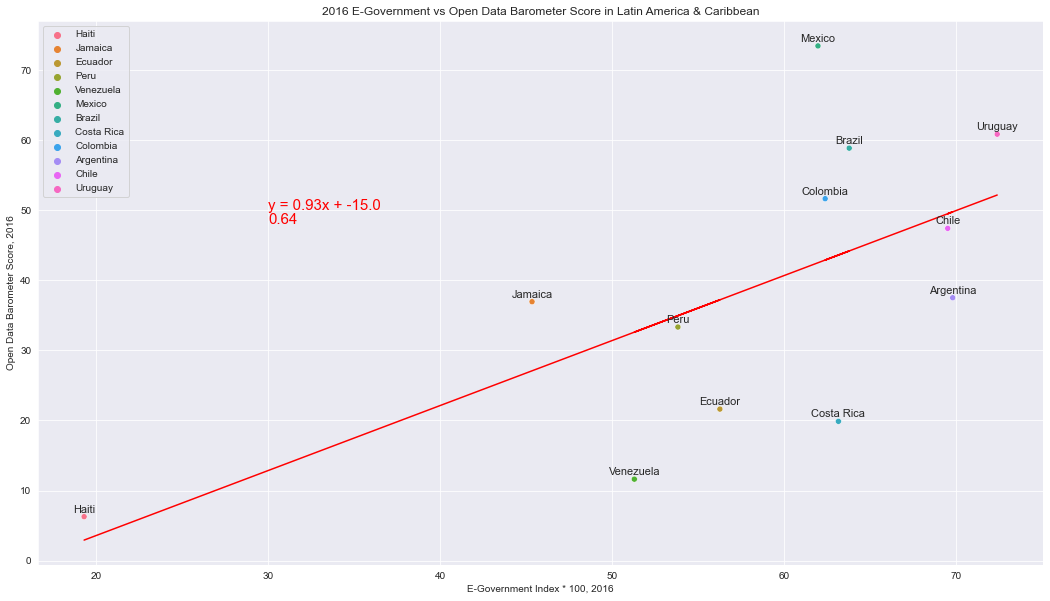

In [21]:
def weather_graphing(x_axis, y_axis, title, xlabel, ylabel, text_coordinates):
    #linear regression
    print(f"The r-squared is : {round(st.pearsonr(x_axis, y_axis)[0],3)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.figure(figsize=(18,10))
    #plt.bar(x_axis, y_axis)
    sns.scatterplot(x = x_axis, y = y_axis, data = latin_region_2016, hue = "Country")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks()
    #plt.grid()
    plt.legend(loc='upper left')
    plt.annotate(line_eq, text_coordinates,fontsize=15,color="red")
    plt.annotate(round(st.pearsonr(x_axis, y_axis)[0],3), (30,48),fontsize=15,color="red")
    plt.plot(x_axis,regress_values,"r-")
    for i, label in enumerate(latin_region_2016['Country']):
        plt.text(x_axis[i], y_axis[i]+1,label, size=11, ha='center', va='center')
    plt.savefig("../Images/2016 E-Government vs Open Data Barometer Score in Latin America & Caribbean")
    
weather_graphing(x_axis, y_axis, "2016 E-Government vs Open Data Barometer Score in Latin America & Caribbean", "E-Government Index * 100, 2016", "Open Data Barometer Score, 2016", (30,50))
sns.set_style('darkgrid')


#### Human Capital vs odb 2016

In [22]:
# odb_human2016_la = df_14_16[['Country', 'Region_2014', 'Human Capital Index_2016', 'ODB-Score-Scaled_2016']]
# odb_human2016_la = odb_human2016_la[odb_human2016_la['Region_2014'] == 'Latin America & Caribbean']
# odb_human2016_la = odb_human2016_la.reset_index(drop = True)

In [23]:
# x_axis = odb_human2016_la['Human Capital Index_2016']*100
# y_axis = odb_human2016_la['ODB-Score-Scaled_2016']


# def weather_graphing(x_axis, y_axis, title, xlabel, ylabel, text_coordinates):
#     #linear regression
#     print(f"The r-squared is : {round(st.pearsonr(x_axis, y_axis)[0],3)}")
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#     regress_values = x_axis * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
#     plt.figure(figsize=(18,10))
#     #plt.bar(x_axis, y_axis)
#     sns.scatterplot(x = x_axis, y = y_axis, data = odb_human2016_la, hue = 'Country')
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.title(title)
#     #plt.grid()
#     plt.annotate(line_eq, text_coordinates,fontsize=15,color="red")
#     plt.plot(x_axis,regress_values,"r-")
    
# weather_graphing(x_axis, y_axis, "Latin America & Caribbean: ODB vs Human capital, 2016", "Human Capital 2016", "ODB- 2016", (60,10))
# sns.set_style('darkgrid')
# for i, label in enumerate(odb_human2016_la['Country']):
#     plt.text(x_axis[i]+.5, y_axis[i],label)